In [1]:
# Part I

In [24]:
import numpy as np
import pandas as pd
from pandas_datareader import data as wb
from scipy.stats import norm
import matplotlib.pyplot as plt
%matplotlib inline

In [25]:
ticker='TSLA'
data=pd.DataFrame()
data[ticker]=wb.DataReader(ticker,data_source='yahoo',start='2010-01-01')['Adj Close']

In [26]:
data.tail()

,TSLA
Date,
2020-05-08,819.419983
2020-05-11,811.289978
2020-05-12,809.409973
2020-05-13,790.960022
2020-05-14,803.330017


In [27]:
log_returns=np.log(1+data.pct_change())
log_returns

,TSLA
Date,
2010-06-29,NaN
2010-06-30,-0.002515
2010-07-01,-0.081723
2010-07-02,-0.134312
2010-07-06,-0.175470
...,...
2020-05-08,0.049252
2020-05-11,-0.009971
2020-05-12,-0.002320


In [28]:
r=0.025

In [29]:
stdev=np.sqrt(log_returns.std()*250)
stdev

TSLA    2.930373
dtype: float64

In [30]:
stdev=stdev.values
stdev

array([2.93037274])

In [39]:
T=1
t_intervals=1000
delta_T=T/t_intervals
iterations=10000

In [40]:
Z=np.random.standard_normal((t_intervals+1,iterations))
S=np.zeros_like(Z)
S0=data.iloc[-1]
S[0]=S0

In [41]:
# S[t]: Stock Price @ Day t
# S[t-1]: Stock Price observed @ Day t-1
# r: Risk Free Rate
# stdev: standard deviation (stdev^2: variance)
# delta_T: fix time interval
# Z[t]: Random component

In [42]:
for t in range(1,t_intervals+1):
    S[t]=S[t-1]*np.exp(((r-(0.5*pow(stdev,2)))*delta_T)+(stdev*Z[t]*(np.sqrt(delta_T))))

In [43]:
S

array([[803.33001709, 803.33001709, 803.33001709, ..., 803.33001709,
        803.33001709, 803.33001709],
       [797.31176589, 794.50915169, 921.68520396, ..., 884.78788745,
        882.58604418, 749.55282452],
       [826.10900306, 845.54302606, 951.74411759, ..., 835.14616277,
        902.6996612 , 733.71339394],
       ...,
       [ 13.38828012,   2.82947896, 719.37911733, ...,   2.70830637,
         31.13909013, 385.15114782],
       [ 14.94140241,   3.29314453, 730.69910225, ...,   2.64980492,
         30.61006671, 370.17976652],
       [ 14.07738903,   3.42112774, 718.36397425, ...,   2.75978995,
         30.37420386, 418.18313951]])

In [44]:
S.shape

(1001, 10000)

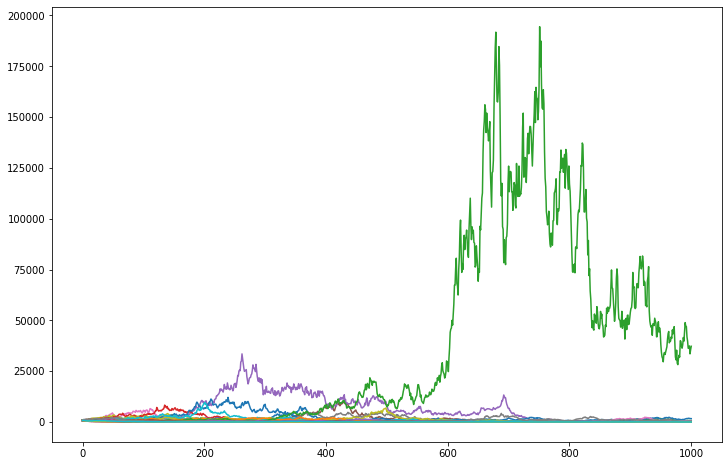

In [52]:
plt.figure(figsize=(12,8));
#plt.plot(S);
plt.plot(S[:,:50]);

In [46]:
# Part II: COP (Call Option Price) 

In [48]:
p=np.maximum(S[-1]-110,0)
p

array([  0.        ,   0.        , 608.36397425, ...,   0.        ,
         0.        , 308.18313951])

In [49]:
p.shape

(10000,)

In [ ]:
# C: COP
# p: Pay-off

In [50]:
C=(np.exp(-r*T)*np.sum(p))/(iterations)
C

632.2125748778999